In [12]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [13]:
#Reading data sets.
#We use index_col=0 so that it doesn't add an index column.

companies_df = pd.read_excel("companies.xlsx", index_col=0)
comp_costs_df = pd.read_excel("company_costs.xlsx",index_col=0)
daily_totals_df = pd.read_excel("daily_totals.xlsx",index_col=0)
meals_df = pd.read_excel("meals.xlsx",index_col=0)
menu_meals_df = pd.read_excel("menu_meals.xlsx",index_col=0)
menus_df = pd.read_excel("menus.xlsx",index_col=0)
no_orders_df = pd.read_excel("no_orders.xlsx",index_col=0)
orders_df = pd.read_excel("orders.xlsx",index_col=0)
users_df = pd.read_excel("users.xlsx",index_col=0)

In [14]:
companies_df

,Name
Id,
1,Gelato Inc
2,Fairpo
3,Yellow Peels


In [15]:
orders_df.head(5)

,Date,User_ID,Meal_ID,Company_Id,Comments
ID,,,,,
34,2019-03-04,GI272,28,1,I don't like brown eggs I want white
33,2019-03-04,GI600,28,1,NaN
31,2019-03-04,GI661,3,1,NaN
32,2019-03-04,GI919,3,1,NaN
30,2019-03-04,GI236,1,1,NaN


In [16]:
orders_df.shape

(1481, 5)

In [17]:
comp_orders_df = pd.merge(orders_df, companies_df, left_on='Company_Id', right_on='Id', how='inner')

In [18]:
comp_orders_df.head(10)

,Date,User_ID,Meal_ID,Company_Id,Comments,Name
0,2019-03-04,GI272,28,1,I don't like brown eggs I want white,Gelato Inc
1,2019-03-04,GI600,28,1,NaN,Gelato Inc
2,2019-03-04,GI661,3,1,NaN,Gelato Inc
3,2019-03-04,GI919,3,1,NaN,Gelato Inc
4,2019-03-04,GI236,1,1,NaN,Gelato Inc
5,2019-03-04,GI800,3,1,NaN,Gelato Inc
6,2019-03-04,GI977,1,1,NaN,Gelato Inc
7,2019-03-04,GI131,1,1,NaN,Gelato Inc
8,2019-03-04,GI215,3,1,NaN,Gelato Inc
9,2019-03-04,GI995,3,1,NaN,Gelato Inc


In [19]:
#Let's know the total number of orders for each company.
comp_orders_df['Name'].value_counts()

Gelato Inc      1478
Yellow Peels       1
Fairpo             1
Name: Name, dtype: int64

In [27]:
#This counts and returns the total number of orders for each company as a dataframe
comp_ords =comp_orders_df[['Company_Id','Name']].groupby('Name').count()

In [29]:
comp_ords =comp_ords.reset_index()

<Container object of 3 artists>

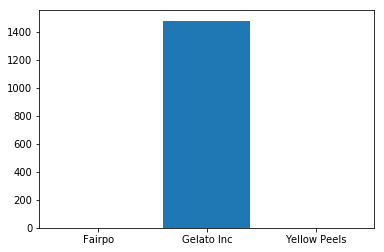

In [30]:
plt.bar(comp_ords['Name'], comp_ords['Company_Id'])

In [31]:
fair =comp_orders_df.Name.value_counts().Fairpo


In [32]:
meal_count_df = pd.merge(orders_df,meals_df, left_on='Meal_ID', right_on='Id',how='inner')

In [33]:
meal_count_df.tail(5)

,Date,User_ID,Meal_ID,Company_Id,Comments,Main_Meal,Side_Dish,Total_Cost
1476,2019-08-20,GI600,8,1,NaN,"Ampesi, Palava Sauce + Wele",Yam - Fish,12
1477,2019-08-20,GI761,8,1,NaN,"Ampesi, Palava Sauce + Wele",Yam - Fish,12
1478,2019-08-27,GI600,8,1,NaN,"Ampesi, Palava Sauce + Wele",Yam - Fish,12
1479,2019-08-13,GI215,10,1,Any other option will be fine with me if reque...,"Ampesi, Palava Sauce + Wele",Riped Plantain - Fish,12
1480,2019-08-15,GI215,34,1,Please choose any other if I need to make changes,"Ampesi, Garden Egg Stew",Riped Plantain - Fish,12


In [34]:
#Looking at the most ordered meals by employees
most_ord_meals=meal_count_df[['Meal_ID','Main_Meal']].groupby('Main_Meal').count().sort_values(by='Meal_ID',ascending=False)

In [35]:
#Running the code gives us the top 5 ordered meals by employees with Jollof being the top with 345 orders
most_ord_meals.head(5)

,Meal_ID
Main_Meal,
"Jollof, Tossed Vegetables + Sauce",345
"Fried Rice, Tossed Vegetables + Sauce",202
"Ampesi, Palava Sauce + Wele",165
"Red-Red, Beans stew + Gari",133
"Fufu, Light Soup",112


In [39]:
most_ord_meals1=meal_count_df[['Meal_ID','Main_Meal']].groupby('Main_Meal').count()


In [40]:
most_ord_meals1 = most_ord_meals.reset_index()

In [51]:
#most_ord_meals1
most_ord_meals1.columns

Index(['Main_Meal', 'Meal_ID'], dtype='object')

In [54]:
most_ord_meals1=most_ord_meals1.rename(columns={'Meal_ID':'Total_Orders'})

In [55]:
most_ord_meals1.head(5)

,Main_Meal,Total_Orders
0,"Jollof, Tossed Vegetables + Sauce",345
1,"Fried Rice, Tossed Vegetables + Sauce",202
2,"Ampesi, Palava Sauce + Wele",165
3,"Red-Red, Beans stew + Gari",133
4,"Fufu, Light Soup",112


In [124]:
most_ord_meals1.tail(10)

,Main_Meal,Total_Orders
9,"Ampesi, Vegetable Egg Stew",47
10,"Banku, Green & Black Pepper",41
11,"Omotuo, Groundnut Soup",37
12,"Kenkey, Pepper & Egg",33
13,"Combo Meal, Plain Rice + Waakye + Jollof",32
14,"Banku, Okra Stew + Wele",32
15,"Noodles, Indomie",6
16,"Plain Rice, Gravy",6
17,"Plain rice, Groundnut Soup + Meat",5
18,"Angwamo, Fried Eggs + Green Pepper Sauce",4


In [ ]:
most_ord_meals11 = pd.merge(most_ord_measl1, meals_df)

In [ ]:
comp_orders_df = pd.merge(orders_df, companies_df, left_on='Company_Id', right_on='Id', how='inner')

<Container object of 19 artists>

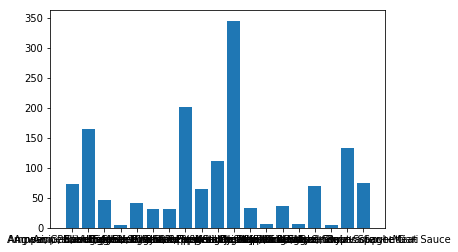

In [49]:
plt.bar(most_ord_meals1['Main_Meal'], most_ord_meals1['Meal_ID'])

In [63]:
meals_df.columns

Index(['Main_Meal', 'Side_Dish', 'Total_Cost'], dtype='object')

In [67]:
main_Side =meal_count_df[['Main_Meal', 'Side_Dish']]

In [68]:
main_Side

,Main_Meal,Side_Dish
0,"Jollof, Tossed Vegetables + Sauce",Egg(1)
1,"Jollof, Tossed Vegetables + Sauce",Egg(1)
2,"Jollof, Tossed Vegetables + Sauce",Egg(1)
3,"Jollof, Tossed Vegetables + Sauce",Egg(1)
4,"Jollof, Tossed Vegetables + Sauce",Egg(1)
...,...,...
1476,"Ampesi, Palava Sauce + Wele",Yam - Fish
1477,"Ampesi, Palava Sauce + Wele",Yam - Fish
1478,"Ampesi, Palava Sauce + Wele",Yam - Fish
1479,"Ampesi, Palava Sauce + Wele",Riped Plantain - Fish


In [92]:
main_Side[['Main_Meal','Side_Dish']].groupby('Side_Dish').count()

,Main_Meal
Side_Dish,
Apem - Egg,10
Apem - Fish,5
Both(Apem),12
Both(Apem) - Egg,21
Both(Apem) - Fish,58
Both(Riped Plantain),25
Both(Riped Plantain) - Egg,97
Both(Riped Plantain) - Fish,6
Chicken,336


In [115]:
main =main_Side.groupby(['Main_Meal','Side_Dish']).size()

In [117]:
mealsFreq = pd.DataFrame(main,columns=['Main_Meal'])

In [118]:
mealsFreq

Main_Meal
Main_Meal                                Side_Dish                             
Ampesi, Garden Egg Stew                  Apem - Egg                           2
                                         Both(Apem) - Egg                    11
                                         Both(Apem) - Fish                   19
                                         Both(Riped Plantain) - Egg          25
                                         Both(Riped Plantain) - Fish          5
                                         Riped Plantain - Egg                 4
                                         Riped Plantain - Fish                1
                                         Yam - Egg                            1
                                         Yam - Fish                           5
Ampesi, Palava Sauce + Wele              Apem - Egg                           8
                                         Apem - Fish                          5
                                         Both(Apem) - Egg                    10
                                         Both(Apem) - Fish                   39
                                         Both(Riped Plantain) - Egg          72
                                         Both(Riped Plantain) - Fish          1
                                         Riped Plantain - Egg                19
                                         Riped Plantain - Fish                1
                                         Yam - Egg                            6
                                         Yam - Fish                           4
Ampesi, Vegetable Egg Stew               Both(Apem)                          12
                                         Both(Riped Plantain)                25
                                         Riped Plantain                       9
                                         Yam                                  1
Angwamo, Fried Eggs + Green Pepper Sauce Sausage                              4
Banku, Green & Black Pepper              Grilled Tilapia                     28
                                         Red Fish                            13
Banku, Okra Stew + Wele                  Fish                                21
                                         Meat                                11
Combo Meal, Plain Rice + Waakye + Jollof Chicken                             16
                                         Egg(1)                               4
                                         Fish                                12
Fried Rice, Tossed Vegetables + Sauce    Chicken                            182
                                         Fish                                14
                                         Grilled Tilapia                      6
Fried Yam, Pepper + Chicken Wings        Fried Sweet Potato                  26
                                         Fried Yam                           27
                                         Mixed                               12
Fufu, Light Soup                         Cow                                 12
                                         Goat                               100
Jollof, Tossed Vegetables + Sauce        Chicken                            138
                                         Egg(1)                             161
                                         Fish                                 5
                                         Gizzard                             38
                                         Grilled Tilapia                      2
                                         Red Fish                             1
Kenkey, Pepper & Egg                     Fried Fish                          33
Noodles, Indomie                         Egg- Sausage- Gizzard                6
Omotuo, Groundnut Soup                   Cow Meat                            37
Plain Rice, Gravy                        Gizzard                      

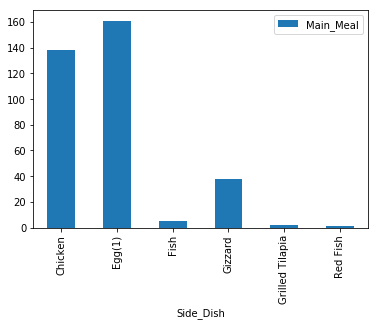

In [122]:
mealsFreq.loc['Jollof, Tossed Vegetables + Sauce'].plot.bar()

In [125]:
no_orders_df

,Date,User_ID,Unnamed: 3,Unnamed: 4,Start_date,End_Date
ID,,,,,,
1,2019-02-25,GI402,NaN,NaT,2019-02-28 20:18:10,2019-02-28 20:18:10
2,2019-02-26,GI402,NaN,NaT,2019-02-28 20:18:55,2019-02-28 20:18:55
3,2019-02-27,GI402,NaN,NaT,2019-02-28 20:19:09,2019-02-28 20:19:09
4,2019-03-04,GI402,NaN,NaT,2019-03-01 14:11:41,2019-03-01 14:11:41
5,2019-03-06,GI402,NaN,2019-03-08 16:26:14,2019-03-01 14:12:02,2019-03-08 16:26:14
6,2019-03-07,GI402,NaN,2019-03-05 10:16:45,2019-03-01 14:12:15,2019-03-05 10:16:45
7,2019-03-05,GI402,NaN,NaT,2019-03-05 11:15:55,2019-03-05 11:15:55
8,2019-03-19,GI402,NaN,2019-03-08 17:14:47,2019-03-08 16:30:43,2019-03-08 17:14:47
9,2019-03-22,GI402,NaN,2019-03-08 17:14:55,2019-03-08 16:31:30,2019-03-08 17:14:55


In [37]:
#We need to count the number of times a USER_ID appears the orders dataframe and count it.
freq_user_ord = comp_orders_df[['User_ID','Company_Id']].groupby('User_ID').count().sort_values(by='Company_Id',ascending=False)

In [38]:
#Finding the user that order most.
freq_user_ord

,Company_Id
User_ID,
GI800,129
GI645,128
GI236,127
GI209,127
GI919,119
GI977,118
GI600,116
GI523,113
GI272,104


In [64]:
mainSide_count = pd.merge(left=orders_df, right=meals_df, left_on="Meal_ID", right_on="Id", how='inner')

In [65]:
mainSide_count

,Date,User_ID,Meal_ID,Company_Id,Comments,Main_Meal,Side_Dish,Total_Cost
0,2019-03-04,GI272,28,1,I don't like brown eggs I want white,"Jollof, Tossed Vegetables + Sauce",Egg(1),10
1,2019-03-04,GI600,28,1,NaN,"Jollof, Tossed Vegetables + Sauce",Egg(1),10
2,2019-03-11,GI523,28,1,NaN,"Jollof, Tossed Vegetables + Sauce",Egg(1),10
3,2019-03-11,GI209,28,1,NaN,"Jollof, Tossed Vegetables + Sauce",Egg(1),10
4,2019-03-11,GI236,28,1,NaN,"Jollof, Tossed Vegetables + Sauce",Egg(1),10
...,...,...,...,...,...,...,...,...
1476,2019-08-20,GI600,8,1,NaN,"Ampesi, Palava Sauce + Wele",Yam - Fish,12
1477,2019-08-20,GI761,8,1,NaN,"Ampesi, Palava Sauce + Wele",Yam - Fish,12
1478,2019-08-27,GI600,8,1,NaN,"Ampesi, Palava Sauce + Wele",Yam - Fish,12
1479,2019-08-13,GI215,10,1,Any other option will be fine with me if reque...,"Ampesi, Palava Sauce + Wele",Riped Plantain - Fish,12
